# Probability that the Center Lies Outside a Random Hexagon

## Problem Statement

Let a circle be given in the plane with fixed center $O$.
Six points are selected independently and uniformly at random on the circumference of the circle.
These six points are ordered according to their angular positions and joined consecutively by straight line segments, with the last point joined to the first, forming a (random) cyclic hexagon.

**Question:**  
What is the probability that the center $O$ of the circle lies **outside** the interior of the hexagon formed by these six randomly chosen points?

---

## Mathematical Formulation

Let  
$$
\Theta_1, \Theta_2, \Theta_3, \Theta_4, \Theta_5, \Theta_6 \sim \text{i.i.d. Uniform}(0, 2\pi)
$$

Define points on the unit circle by  
$$
P_i = (\cos \Theta_i, \sin \Theta_i), \quad i = 1, \ldots, 6.
$$

After sorting the angles in increasing order, connect the corresponding points to form a cyclic hexagon $H$.

We wish to compute
$$
\mathbb{P}\bigl( O \notin \operatorname{int}(H) \bigr).
$$

---

## Key Geometric Observation

The center $O$ lies outside the hexagon if and only if all six points lie within some semicircle.

Equivalently, if
$$
0 \le \Theta_{(1)} < \Theta_{(2)} < \cdots < \Theta_{(6)} < 2\pi,
$$
and we define the circular gaps
$$
G_i =
\begin{cases}
\Theta_{(i+1)} - \Theta_{(i)}, & i = 1, \ldots, 5, \\
2\pi - \Theta_{(6)} + \Theta_{(1)}, & i = 6,
\end{cases}
$$
then the center lies outside the hexagon if
$$
\max(G_1, \ldots, G_6) \ge \pi.
$$

---

## Objective

1. Estimate the probability
$$
\mathbb{P}\bigl( O \notin \operatorname{int}(H) \bigr)
$$
using Monte Carlo simulation.

2. Compare the numerical estimate with the theoretical value
$$
\frac{3}{16}.
$$

---

## Expected Result

The simulation should converge to
$$
\mathbb{P}\bigl( O \notin \operatorname{int}(H) \bigr) = \frac{3}{16} \approx 0.1875.
$$


In [1]:
import numpy as np

def trial(n_points=6, trials=200000):
    count_outside = 0
    
    for _ in range(trials):
        angles = np.sort(np.random.uniform(0, 2*np.pi, n_points))
        gaps = np.diff(np.append(angles, angles[0] + 2*np.pi))
        if np.max(gaps) >= np.pi:
            count_outside += 1
    
    return count_outside / trials

np.random.seed(42)
estimated_prob = trial()
estimated_prob


0.1876

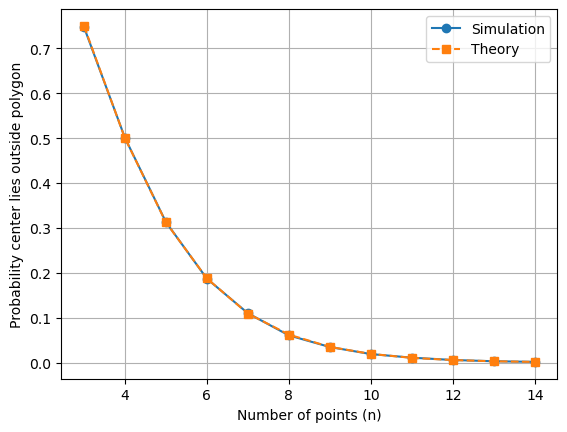

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_prob(n, trials=200000):
    count = 0
    for _ in range(trials):
        angles = np.sort(np.random.uniform(0, 2*np.pi, n))
        gaps = np.diff(np.append(angles, angles[0] + 2*np.pi))
        if np.max(gaps) >= np.pi:
            count += 1
    return count / trials

# Range of n
ns = np.arange(3, 15)
simulated = [estimate_prob(n, trials=100000) for n in ns]
theoretical = [n / (2**(n-1)) for n in ns]

plt.figure()
plt.plot(ns, simulated, marker='o', label='Simulation')
plt.plot(ns, theoretical, marker='s', linestyle='--', label='Theory')
plt.xlabel("Number of points (n)")
plt.ylabel("Probability center lies outside polygon")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import numpy as np

def estimate_probability(n, trials=200000):
    """
    Estimates P(center lies outside the polygon)
    formed by n random points on a circle.
    """
    count = 0
    for _ in range(trials):
        angles = np.sort(np.random.uniform(0, 2*np.pi, n))
        gaps = np.diff(np.append(angles, angles[0] + 2*np.pi))
        if np.max(gaps) >= np.pi:
            count += 1
    return count / trials


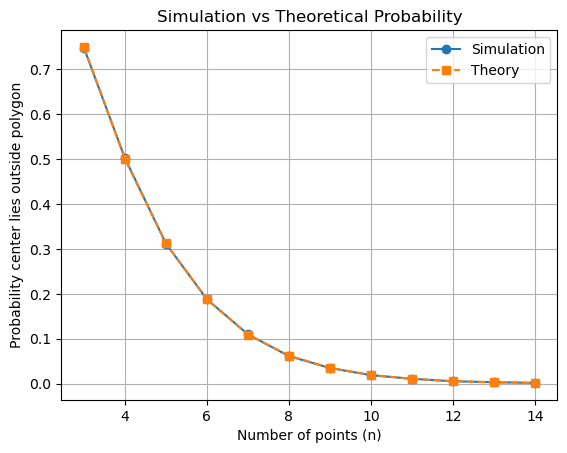

In [4]:
import matplotlib.pyplot as plt

ns = np.arange(3, 15)
simulated = [estimate_probability(n, trials=100000) for n in ns]
theoretical = [n / (2**(n-1)) for n in ns]

plt.figure()
plt.plot(ns, simulated, marker='o', label='Simulation')
plt.plot(ns, theoretical, linestyle='--', marker='s', label='Theory')
plt.xlabel("Number of points (n)")
plt.ylabel("Probability center lies outside polygon")
plt.title("Simulation vs Theoretical Probability")
plt.legend()
plt.grid(True)
plt.show()


## Gap Distribution and the Dirichlet Law

Let
$$
0 \le \Theta_{(1)} < \Theta_{(2)} < \cdots < \Theta_{(n)} < 2\pi
$$
be the ordered angles of the randomly chosen points.

Define circular gaps:
$$
G_i =
\begin{cases}
\Theta_{(i+1)} - \Theta_{(i)}, & i = 1, \ldots, n-1, \\
2\pi - \Theta_{(n)} + \Theta_{(1)}, & i = n.
\end{cases}
$$

Then
$$
G_1 + G_2 + \cdots + G_n = 2\pi.
$$

The normalized gaps
$$
X_i = \frac{G_i}{2\pi}
$$
satisfy
$$
X_1 + \cdots + X_n = 1, \quad X_i \ge 0,
$$
and the vector $(X_1, \ldots, X_n)$ follows a **Dirichlet$(1,\ldots,1)$ distribution**, i.e. it is uniformly distributed over the simplex.

The center lies outside the polygon if and only if
$$
\max(X_1, \ldots, X_n) \ge \frac{1}{2}.
$$

Since at most one gap can exceed $\frac{1}{2}$, we obtain
$$
\mathbb{P}(\text{center outside}) = n \cdot \mathbb{P}\left(X_1 \ge \frac{1}{2}\right).
$$

Using the marginal distribution
$$
X_1 \sim \text{Beta}(1, n-1),
$$
we obtain
$$
\mathbb{P}(\text{center outside}) = \frac{n}{2^{n-1}}.
$$


## Conclusion

We studied the probability that the center of a circle lies outside the polygon formed by
$n$ points chosen independently and uniformly at random on the circumference.

Both analytic and Monte Carlo methods show that
$$
\mathbb{P}(\text{center lies outside}) = \frac{n}{2^{n-1}}.
$$

The probability decays exponentially with $n$, implying that random polygons with many vertices
almost surely contain the center.

This result follows naturally from the Dirichlet distribution of circular gaps and highlights
a deep connection between random geometry, order statistics, and probability on simplices.
